<a href="https://colab.research.google.com/github/GeorgeOgeorge/data_mining_exercices/blob/main/exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas que serão utilizadas na resolução dos exercícios
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import matplotlib.pyplot as plt

# Questão 1 

Sobre compressão de atributos por meio da análise dos componentes principais
(Principal Component Analysis – PCA), considere a base de dados escolhida
para trabalhar ao longo desta disciplina (caso prefira, pode ser uma nova
base). Apresente, por meio de gráfico, a relação entre o 1º e o 2º componente
principal da base de dados. Após a plotagem do gráfico, observe se há uma
separação linear entre dois grupos de objetos que pode contribuir para o melhor
desempenho dos algoritmos de mineração de dados. Descreva sua análise.


## Simplificando grupos e normalizando dados

Para essa etapa estamos lendo a base de dados [_wine quality_](https://archive.ics.uci.edu/ml/datasets/wine+quality) e agrupando todos os subgrupos em dois grupos princiais.

Considerando que temos um intervalo de 0 -> 10 para determinar a qualidade do vinho estou utilizando o criteiro (qualidade < 7) = ruim se não bom para resumir os grupos.

Nessa etapa também é necessário fazer a normalização dos dados.

In [ ]:
# Carregar a base de dados em um DataFrame do Pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

# Separando registros em duas classes vinhos ruins=0 bons=1 
df['quality'] = df['quality'].apply(lambda quality: 1 if quality > 6 else 0)

In [ ]:
# Separar os atributos da coluna alvo(quality)
X = df.iloc[:, :-1].values

In [ ]:
# Normalizar os atributos
sc = StandardScaler()
X = sc.fit_transform(X)

## Aplicando PCA para reduzir componentes existentes

Nessa etapa esmos definindo que vamos reduzir os atributos para apenas dois componentes principais. Após a redução vemos que foram criados dois PCs que são compostos respectivamente por:

- PC1:
  - fixed acidity
  - citric acid
  - density
  - Ph

- PC2:
 - free sulfur dioxide
 - total sulfur dioxide
 - alcohol
 - sulphates


In [ ]:
# Aplicar a PCA com 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Obter os nomes dos atributos originais
atributos = df.columns[:-1]
coeficientes = pca.components_

In [ ]:
# Criar um DataFrame com os nomes dos atributos e os coeficientes de carga
df_coeficientes = pd.DataFrame(coeficientes.T, columns=["PC1", "PC2"])
df_coeficientes["Atributo"] = atributos

In [ ]:
# Visualizar o DataFrame com os nomes dos atributos e os coeficientes de carga
print(df_coeficientes.sort_values(['PC1', 'PC2'], ascending=False))

         PC1       PC2              Atributo
0   0.489314 -0.110503         fixed acidity
2   0.463632 -0.151791           citric acid
7   0.395353  0.233575               density
9   0.242921 -0.037554             sulphates
4   0.212247  0.148052             chlorides
3   0.146107  0.272080        residual sugar
6   0.023575  0.569487  total sulfur dioxide
5  -0.036158  0.513567   free sulfur dioxide
10 -0.113232 -0.386181               alcohol
1  -0.238584  0.274930      volatile acidity
8  -0.438520  0.006711                    pH


## Buscando correlação entre componentes

Vemos que a diagnoal secundaria possui um valor menor que está longe do 1 logo vemos que não existe uma correlção.

segue grafico plotado referente à correlação.

In [ ]:
# Verificar a correlação entre o primeiro e o segundo componente principal
corr = pd.DataFrame(X_pca, columns=["PC1", "PC2"]).corr()
print(corr)

              PC1           PC2
PC1  1.000000e+00 -2.960509e-16
PC2 -2.960509e-16  1.000000e+00


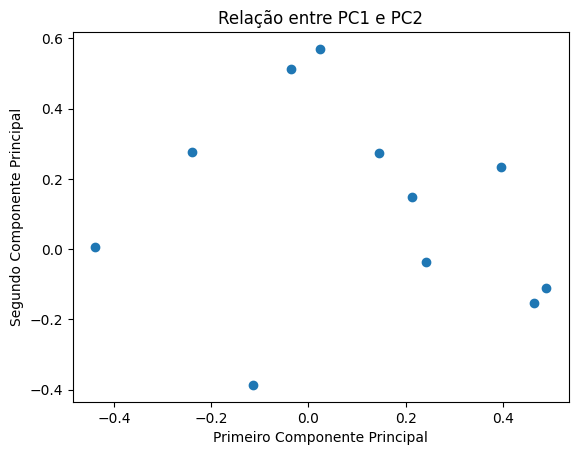

In [ ]:
# Exibir relação entre pc1 e pc2
plt.scatter(df_coeficientes['PC1'], df_coeficientes['PC2'])
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Relação entre PC1 e PC2')
plt.show()

## Calculando separação linear entre classes

Utilizando o que foi feito até aqui e aplicando um calculo de separação linear temos uma separação linear de 86% indica que há uma boa distinção entre as classes e que o modelo é capaz de separar bem os dados.

In [ ]:
 # Separar os atributos dos rótulos
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Aplicar a LDA com 1 componente
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_pca, y)

# Verificar a separação linear entre as classes
print("Separação linear entre as classes: ", lda.score(X_pca, y))

Separação linear entre as classes:  0.8642901813633521


# Questão 2

O conjunto de dados da Tabela abaixo, chamado Fidelização, trata de uma
tentativa de obter dados das visitas dos clientes ao restaurante com o propósito
de descobrir se existem fatores que contribuem para um cliente se fidelizar ao
estabelecimento ou não. Os atributos descritivos de cada situação dizem respeito
a diferentes tipos de avaliação realizadas em uma visita ao restaurante.

In [ ]:
df = pd.read_csv('/content/questao_2.csv')

a) Realize uma análise exploratória dos dados de forma a verificar se conclusões sobre fidelização podem ser tiradas a partir dessa análise. Em sua análise, verifique as medidas de posição e separatrizes, medidas de dispersão, projete gráficos do tipo histograma e boxplot e realize análise de correlação.

In [ ]:
df

,AVALIAÇÃO 1,AVALIAÇÃO 2,AVALIAÇÃO 3,Situação
0,"9,69","22,91","2,36",Fidelizado
1,"5,54","28,64","5,17",Fidelizado
2,??,"22,91",??,Fidelizado
3,"12,46","40,09","3,22",Fidelizado
4,"11,07","17,18","1,55",Fidelizado
5,"8,30",57.27,"6,90",Fidelizado
6,"2,77","34,36","12,41",Não fidelizado
7,"5,54",17.18,"6,01",Não fidelizado
8,??,"11,45",??,Não fidelizado
9,"8,30",??,??,Não fidelizado
